# **KNN Classifier on Social Network DataSet**















##Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Reading the Social Network Data

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


##Splitting the Features and the Target from the Data Set

In [28]:
X = df.iloc[:,:-1] # -> Returns a Data Frame
#X = df.iloc[:,:-1].Values -> Return an Array
y = df.iloc[:,-1]
print(X.shape, type(X))
print(y.shape, type(y))

(400, 2) <class 'pandas.core.frame.DataFrame'>
(400,) <class 'pandas.core.series.Series'>


##Splitting the Train Test Data

In [31]:
from sklearn.model_selection import train_test_split
#Train_Test_Split allows Array and Data Frames both
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

##Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## PairPlotting -> Uses the Features in Pairs and shows the Target respect to the repective pair of Features

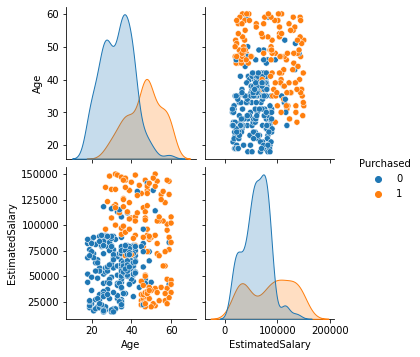

In [44]:
import seaborn as sns
sns.pairplot(df, hue = 'Purchased')

##Creating a KNN Classifier with 5 as the K value

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55  3]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

0.95


## Creating Classifiers from 1 to 40 K value and Getting the Error Rate

In [47]:
error_rate = []
for i in range(1,40) :
  classifier = KNeighborsClassifier(n_neighbors = i, p = 2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  error_rate.append(1 - accuracy_score(y_test, y_pred))
print(error_rate)

[0.13749999999999996, 0.11250000000000004, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044]


##Elbow Method K = 3 is the best accoring to it

Text(0, 0.5, 'Error Rate')

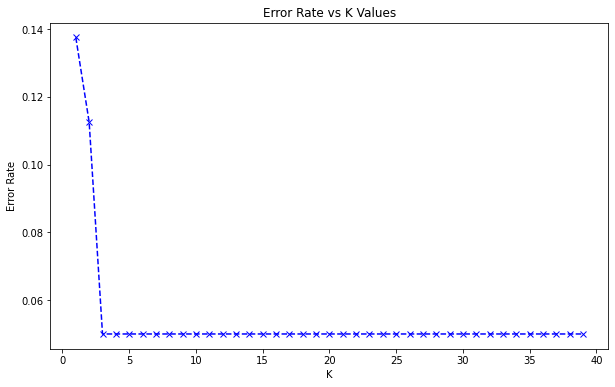

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'x')
plt.title('Error Rate vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')